In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)

# Funções

In [2]:
def separa_pontos_manual(intensidade_relativa = 0.1,centro = 0,linha = 0, spec_mensurado = None):

    #global x_espec,y_espec

    #linha = lines[id].tolist()

    #centro = float(linha[2])

    x_espec = list(spec_mensurado['wavenumber'])
    y_espec = list(spec_mensurado['intensity'])
    

    pontosx = []
    pontosy = []

    # intensidade do centro e dos pontos adjacentes
    icentro = float(linha)
    iponto = float(linha)# só inicializando a variável, preciso disso para entrar no while (1 > intensidade_relativa)

    esquerda_x = []
    esquerda_y = []

    direita_x = []
    direita_y = []


    i = 1

    # para a esquerda
    while (iponto / icentro >= intensidade_relativa):


        # aqui é de fato o valor da intensidade dos pontos adjacentes
        iponto = y_espec[y_espec.index(icentro) - i]



        if iponto / icentro >= intensidade_relativa:
            esquerda_x.insert(-i, x_espec[x_espec.index(centro) - i])
            esquerda_y.insert(-i, y_espec[y_espec.index(icentro) - i])


        i = i + 1

    # Para direita

    icentro = float(linha)
    iponto  = float(linha)
    i = 1
    while (iponto / icentro >= intensidade_relativa):

        iponto = y_espec[y_espec.index(icentro) + i]


        if iponto / icentro >= intensidade_relativa:
            direita_x.insert(i, x_espec[x_espec.index(centro) + i])
            direita_y.insert(i, y_espec[y_espec.index(icentro) + i])


        i = i + 1

    pontos_x = esquerda_x + [centro] + direita_x

    pontos_y = esquerda_y + [icentro] + direita_y

   

    return pd.DataFrame({'wavenumber':pontos_x, 'intensity':pontos_y})

In [3]:
def feature_extractor(pontos,temperatura,pressao, centro,intensidade):
    f = dict()
    estats = pontos['wavenumber'].agg(['mean','std','skew','kurtosis','max','min','median']).to_frame().T
    for stat in estats:
        f[stat+"_wv"] = [estats[stat].values[0]]
    
    estats = pontos['intensity'].agg(['mean','std','skew','kurtosis','max','min','median']).to_frame().T
    for stat in estats:
        f[stat+"_int"] = [estats[stat].values[0]]

    f['temperatura'] = temperatura
    f['pressao'] = pressao
    f['centro'] = centro
    f['intensidade'] = intensidade
    return pd.DataFrame(f)

# Desenvolvimento para o HCl

In [4]:
paths = pd.read_csv('../datasets/projeto_final/paths.csv')
lines = pd.read_csv('../datasets/projeto_final/line_features.csv')

paths['kelvin'] = paths['kelvin'].astype('int')

lines['temperature'] = lines['temperature'].astype('int')

paths['pressao'] = paths['pressao'].astype('int')

lines['pressure'] = lines['pressure'].astype('int')

In [5]:
display(paths.head())
display(lines.head())

,caminho,kelvin,pressao,celsius
0,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_78mbar.csv,293,78,20
1,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_145mbar.csv,293,145,20
2,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_200mbar.csv,293,200,20
3,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_398mbar.csv,293,398,20
4,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_790mbar.csv,293,790,20


,id,j,branch,wavenumber,intensity,pressure,temperature,model,npoints,rms,...,center,center_std,sigma,sigma_std,gamma,gamma_std,fwhm,fwhm_std,height,height_std
0,1,0,R37,5683.56703,0.87873,145,293,Voigt,213,0.008676,...,5683.566427,0.000064,0.004739,0.000291,0.033105,0.000096,0.068169,0.000187,0.871084,0.001636
1,2,1,R37,5701.98259,1.23987,145,293,Voigt,243,0.011539,...,5701.982114,0.000064,0.005280,0.000301,0.037694,0.000096,0.077525,0.000186,1.239598,0.002040
2,3,2,R37,5719.16744,1.36729,145,293,Voigt,251,0.009300,...,5719.167044,0.000048,0.004839,0.000256,0.039601,0.000071,0.080923,0.000140,1.370850,0.001614
3,4,3,R37,5735.10744,1.37998,145,293,Voigt,248,0.011386,...,5735.107073,0.000057,0.005394,0.000270,0.038495,0.000086,0.079175,0.000167,1.379281,0.001992
4,5,4,R37,5749.79130,1.32506,145,293,Voigt,217,0.009909,...,5749.791425,0.000049,0.004263,0.000236,0.034073,0.000073,0.069696,0.000143,1.325381,0.001849


Com a pressão e a temperatura eu consigo fazer o link entre os espectros e as minhas tabelas. Com o wavenumber eu identifico as linhas e extraio as features

In [6]:
principal = lines[['wavenumber','intensity','j','branch','pressure','temperature','fwhm','gamma','sigma']]
principal.head()

,wavenumber,intensity,j,branch,pressure,temperature,fwhm,gamma,sigma
0,5683.56703,0.87873,0,R37,145,293,0.068169,0.033105,0.004739
1,5701.98259,1.23987,1,R37,145,293,0.077525,0.037694,0.005280
2,5719.16744,1.36729,2,R37,145,293,0.080923,0.039601,0.004839
3,5735.10744,1.37998,3,R37,145,293,0.079175,0.038495,0.005394
4,5749.79130,1.32506,4,R37,145,293,0.069696,0.034073,0.004263


In [7]:
paths['caminho'] = paths['caminho'].astype('object')

In [8]:
pressoes = principal['pressure'].unique()

temperaturas = principal['temperature'].unique()
error = {'path':[]}
c=0
ok = 0
features = pd.DataFrame()
for temp in temperaturas:
    for pres in pressoes:
        caminho = paths.query(f'kelvin == {temp} and pressao == {pres}')['caminho']
        
        try:
            spec = pd.read_csv(caminho.values[0])
            spec.columns = ['wavenumber','intensity']
        except:
            print(f"Error:",caminho)
            c+=1
            continue
            

        centros = principal.query(f'temperature == {temp} and pressure == {pres}')['wavenumber']
        print(temp,pres)
        for centro in centros:
            try:
                intensidade = spec.query(f'wavenumber == {centro}')['intensity']
                pontos = separa_pontos_manual(intensidade_relativa=0.3,spec_mensurado=spec,centro = centro, linha= intensidade)
                intensidade=float(intensidade)
                features = pd.concat([features,feature_extractor(pontos,temp,pres,centro,intensidade)])
                ok+=1
            except:
                c+=1
print(c,ok)

df = pd.merge(left = principal, right= features,
         left_on = ['wavenumber','intensity','pressure','temperature'],
         right_on = ['centro','intensidade','pressao','temperatura']).drop_duplicates()

df_final = df.drop(['temperatura','pressao','centro','intensidade'],axis=1)

293 145
293 78
293 200
293 790
293 398
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
313 141
313 27
313 211
313 76
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], Name: caminho, dtype: object)
Error: Series([], N

In [9]:
paths

,caminho,kelvin,pressao,celsius
0,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_78mbar.csv,293,78,20
1,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_145mbar.csv,293,145,20
2,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_200mbar.csv,293,200,20
3,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_398mbar.csv,293,398,20
4,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/20°C/hcl_20_20c_790mbar.csv,293,790,20
5,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/40°C/hcl_20_40c_27mbar.csv,313,27,40
6,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/40°C/hcl_20_40c_76.9mbar.csv,313,76,40
7,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/40°C/hcl_20_40c_141mbar.csv,313,141,40
8,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/40°C/hcl_20_40c_211mbar.csv,313,211,40
9,/home/alexandre/Área de Trabalho/ic/Espectros para os ajustes/42°C/hcl_20_42c_181mbar.csv,315,181,42


In [10]:
spec = pd.read_csv(paths.loc[12,'caminho'])
spec.columns = ['wavenumber','intensity']
pontos = separa_pontos_manual(intensidade_relativa=0.3,spec_mensurado=spec,centro = 5551.72127, linha= 2.19852)
pontos.agg(['mean','std','skew','kurtosis','max','min','median'])

,wavenumber,intensity
mean,5551.720324,1.438875
std,0.058986,0.514915
skew,0.000010,0.048898
kurtosis,-1.200001,-1.433454
max,5551.821080,2.198520
min,5551.619570,0.661260
median,5551.720325,1.415490


In [11]:
df_final.to_csv('../datasets/projeto_final/data.csv',index=None)

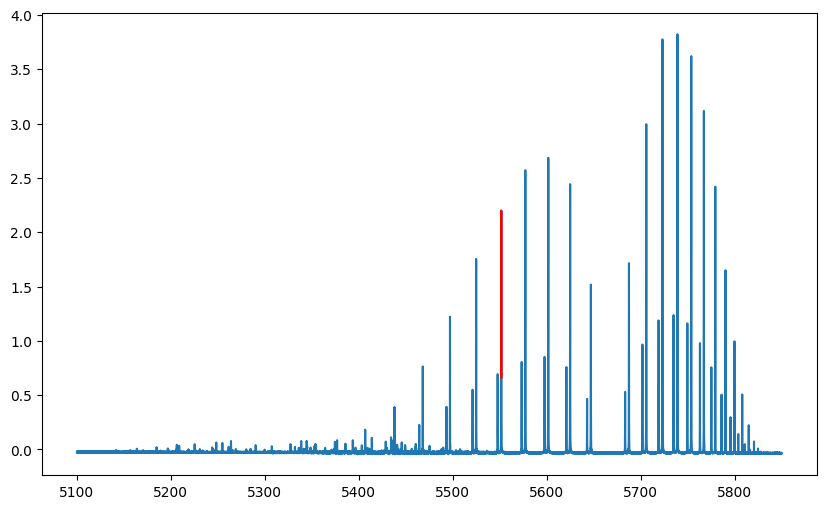

In [12]:
plt.figure(figsize=(10,6))
plt.plot(spec['wavenumber'],spec['intensity'])
plt.plot(pontos['wavenumber'], pontos['intensity'],c='red')